In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import cmath
gi=0

# testing with generated data

freq:  2.5
10000.0
1000
(501, 80001)


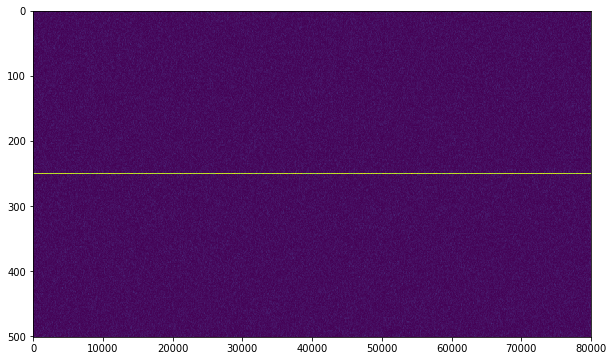

In [65]:
gi=gi+1
samples = 40000000#120000
f=samples/16000000
print("freq: ",f)
s_rate=4000#samples#
t=samples/s_rate
tmin=0
tmax=t
nyquist=s_rate/2
np.random.seed(20111)

x = np.linspace(start=0,num=samples,stop=t)

data = np.random.normal(0,0.5,samples)+1*np.sin(((f*t*x)%1)*2*np.pi)

prefix_str = "test_"
print(t)

n = 1000 #int(3*2*samples**0.5)
print(n)
len_fft = n
fft_jump=n/2
f_ax, t_ax, stft = scipy.signal.stft(data, nperseg=n, noverlap = n-fft_jump, nfft = len_fft, )#fs =s_rate
#t_ax=t_ax/samples*t
stft=stft*2

print(stft.shape)
plt.figure(figsize=(10,6))
plt.imshow(np.abs(stft[:]),aspect='auto')
plt.show()

In [67]:
#%%script false
#ridge following
ridgei=np.zeros(len(t_ax))
ridge_amp=np.zeros(len(t_ax),dtype=complex)#
stft_abs=np.abs(stft)
viewf_i=len_fft

search_r=5
include_r=20
i_center=np.argmax(np.abs(stft[:,0]))#600#int(f*viewf_i/nyquist)
print("i_center: ",i_center)
print("mult: ",nyquist/viewf_i)
print(nyquist)

search_r=int(search_r)
print("ridge_start index: ",i_center-include_r)
search_area=np.abs(stft[i_center-include_r:i_center+include_r])
ridgei[0]=np.argmax(search_area[:,0])
for i in range(1,len(t_ax)):
    if i%10000 == 0:
        print(ridgei[i-1])
    ridgei[i]=np.argmax(search_area[:,i])
    ridge_amp[i]=stft[int(ridgei[i]+i_center-include_r),i]
ridgei=ridgei+i_center-include_r
print("ridgei:  ",np.average(ridgei))

i_center:  250
mult:  2.0
2000.0
ridge_start index:  230
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
ridgei:   250.0


freq_index 150
155


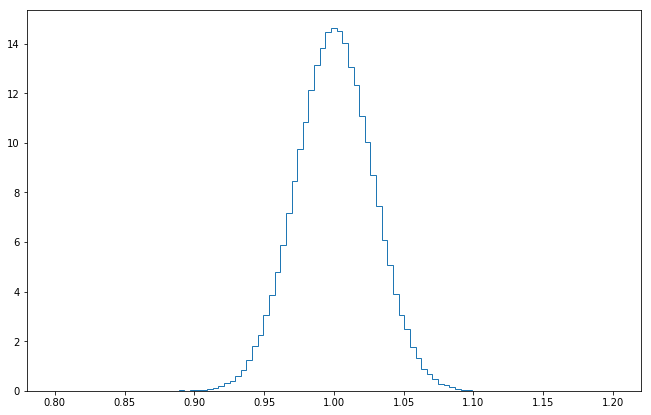

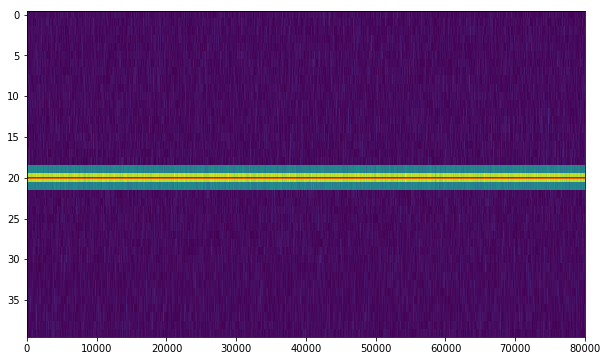

500.0
1000 2000.0


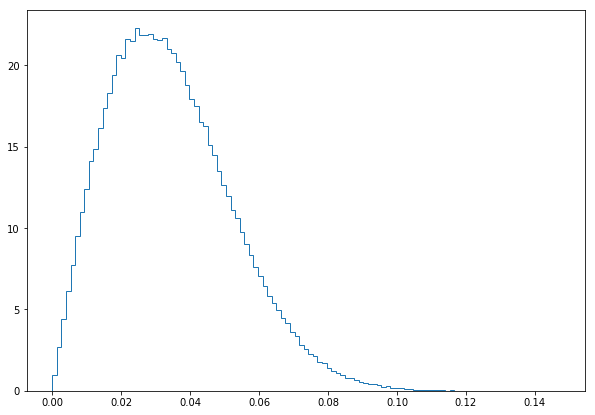

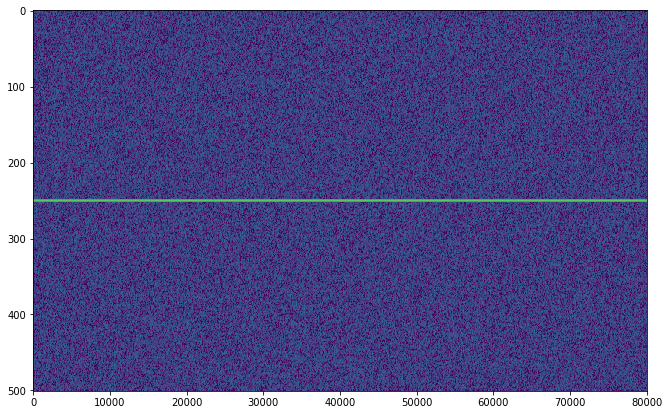

In [78]:
f1=300
f2=310
f_i1=int(f1*viewf_i/nyquist)
print("freq_index",f_i1)
f_i2=int(f2*viewf_i/nyquist)
print(f_i2)
randrange_x=[tmin,tmin,tmax,tmax,tmin]
randrange_y=[f2,f1,f1,f2,f2]

binnum=99
plt.figure(figsize=(11,7))
n1, bins1, patches1 = plt.hist(np.abs(ridge_amp), bins=binnum, density = True,facecolor='b',histtype='step',range=(0.8,1.2))
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(search_area,aspect='auto')
plt.plot(ridgei-i_center+include_r,'r')#t_ax,
plt.show()

wievd=samples
wievf_i=len_fft
print(np.average(ridgei[:10])/wievf_i*nyquist)
print(len_fft,nyquist)

import matplotlib.colors as colors
colornorm=colors.LogNorm(vmin=0.01, vmax=5)

amplitude=np.abs(stft[f_i1:f_i2]).flatten()#int(np.average(ridgei))-25  

plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(np.abs(amplitude), bins=111, density = True,facecolor='b',histtype='step')#4.2,4.7,
#plt.xlim(4.2,4.7)
plt.savefig("hist")
plt.show()

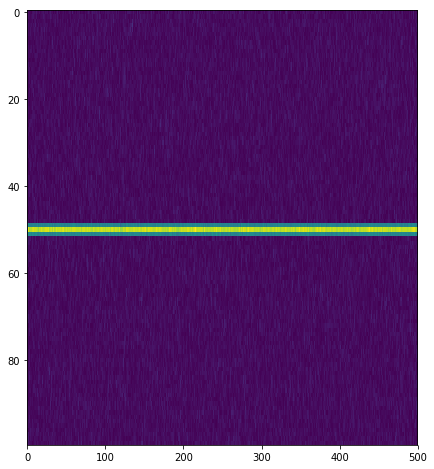

In [48]:
plt.figure(figsize=(7,8))
plt.imshow(np.abs(stft[200:300,0:500]),aspect='auto')
plt.show()

In [79]:
locg, stdg = scipy.stats.norm.fit(np.abs(amplitude))#,loc=0.5
print("normfit")
shape_r,loc_r,scale_r=scipy.stats.rice.fit(np.abs(amplitude))#,floc=0
shape_r2,loc_r2,scale_r2=scipy.stats.rice.fit(np.abs(ridge_amp),floc=0)

print(locg,stdg)
print(shape_r,loc_r,scale_r)
print("Amplitúdó Rice eloszlással: ",shape_r*scale_r+loc_r, ",  Var: ", np.sqrt(scale_r))
print("Amplitúdó Gauss eloszlással: ",locg, ",  Var: ", np.sqrt(stdg))

normfit


C:\Users\Marci\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


0.03429498389007874 0.017886183311227433
0.3781886086350301 1.5400417421833194e-05 0.026412372917493016
Amplitúdó Rice eloszlással:  0.010004258981838068 ,  Var:  0.16251883865414807
Amplitúdó Gauss eloszlással:  0.03429498389007874 ,  Var:  0.1337392362443701


Zaj:
0.05388128799561231 0.028243855123431433
0.0012425123713100464 0 0.04301689031333428
Amplitúdó Rice eloszlással:  5.3449018389605135e-05
Amplitúdó Gauss eloszlással:  0.05388128799561231 ,  Var:  0.16805908224023905

Jel:
0.9938795615182778 0.049566682596736786
20.013851182443467 0 0.04959763968882898
Amplitúdó Rice eloszlással:  0.9926397797326749
Amplitúdó Gauss eloszlással:  0.9938795615182778 ,  Var:  0.22263576216937114

37.87249889957768
1.0003025642529895
0.026412372917493016
0.0


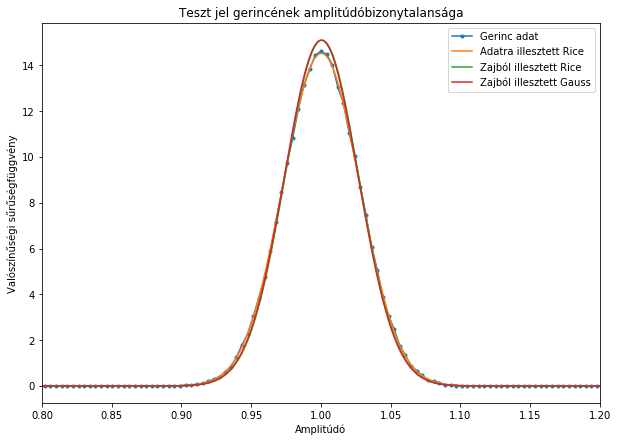

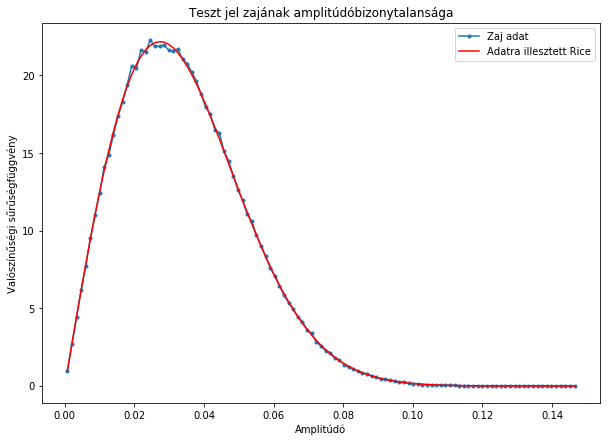

In [112]:
s2=scale_r#0.04301689031333428
v2=np.mean(np.abs(ridge_amp))
loc2=loc_r
print(v2/s2)
print(v2)
print(s2)
print(np.min(np.abs(ridge_amp)))

dist_x=bins[:-1]/2+bins[1:]/2
dist_x1=bins1[:-1]/2+bins1[1:]/2

plt.figure(figsize=(10,7))
x2=np.linspace(start=0.8,num=300,stop=1.2)
#plt.plot(dist_x,scipy.stats.rice.pdf(dist_x,shape_r,loc_r,scale_r),'r.-') 
plt.plot(dist_x1,n1,'.-',label="Gerinc adat") 
plt.plot(x2,scipy.stats.rice.pdf(x2,shape_r2,0.00,scale_r2),'-',label="Adatra illesztett Rice")
plt.plot(x2,scipy.stats.rice.pdf(x2,v2/s2,loc2,s2),'-',label="Zajból illesztett Rice") 
plt.plot(x2,scipy.stats.norm.pdf(x2,loc=v2-loc2,scale=s2),'-',label="Zajból illesztett Gauss") 
plt.xlim(0.8,1.2)
plt.legend()
plt.title("Teszt jel gerincének amplitúdóbizonytalansága")
plt.ylabel("Valószínűségi sűrűségfüggvény")
plt.xlabel("Amplitúdó")
plt.savefig("compare00", dpi =400)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(dist_x,n,'.-',label="Zaj adat")
plt.plot(dist_x,scipy.stats.rice.pdf(dist_x,shape_r,loc_r,scale_r),'r-',label="Adatra illesztett Rice")
plt.legend()
plt.title("Teszt jel zajának amplitúdóbizonytalansága")
plt.ylabel("Valószínűségi sűrűségfüggvény")
plt.xlabel("Amplitúdó")
plt.savefig("norm_compare0", dpi =360)
plt.show()

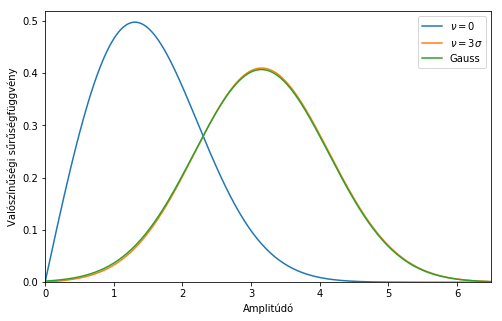

In [116]:
plt.figure(figsize=(8,5))
x2=np.linspace(start=0,num=300,stop=6.5)
plt.plot(x2,scipy.stats.rice.pdf(x2,1,0),'-',label="$\u03BD = 0$")
plt.plot(x2,scipy.stats.rice.pdf(x2,3,0),'-',label="$\u03BD = 3\sigma$") 
plt.plot(x2,scipy.stats.norm.pdf(x2,loc=3.15,scale=0.98),'-',label="Gauss")
plt.legend()
plt.xlim(0,6.5)
plt.ylim(0,0.52)
#plt.title("Teszt jel gerincének amplitúdóbizonytalansága")
plt.ylabel("Valószínűségi sűrűségfüggvény")
plt.xlabel("Amplitúdó")
plt.savefig("Rice", dpi =400)
plt.show()

In [ ]:
len_amp = len(np.abs(ridge_amp))
avg_diff=0
for i in range(len_amp-1):
    avg_diff = avg_diff+np.abs(np.abs(ridge_amp[i])-np.abs(ridge_amp[i+1]))/len_amp
print(avg_diff)
print(s2)
print(avg_diff/s2)

In [ ]:
amp_im = stft[int(np.average(ridgei))].imag.flatten()
amp_re = stft[int(np.average(ridgei))].real.flatten()

plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(amp_re, bins=211, density = True,facecolor='b',histtype='step')#4.2,4.7,range=(0.7,1.3)
#plt.xlim(4.2,4.7)
plt.savefig("hist_re")
plt.show()
dist_x=bins[:-1]

plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(amp_im, bins=211, density = True,facecolor='b',histtype='step')#4.2,4.7,range=(0.7,1.3)
#plt.xlim(4.2,4.7)
plt.show()
dist_x=bins[:-1]

loc_im, std_im = scipy.stats.norm.fit(amplitude.imag)
loc_re, std_re = scipy.stats.norm.fit(amplitude.real)

In [ ]:
%%script false
max = np.max(np.abs(stft))
plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, np.abs(stft), vmin=0, vmax=max, shading='plasma')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_abs")
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, stft.real, vmin=-max, vmax=max, shading='plasma')
plt.title('STFT Real')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_real")
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, stft.imag, vmin=-max, vmax=max, shading='plasma')
plt.title('STFT Imag')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_imag")
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, np.angle(stft), vmin=-6, vmax=6, shading='plasma')
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_phase")
plt.show()

In [ ]:
%%script false
shape_h=25
scale_h=25
loc_h=18
diff = np.zeros((shape_h,scale_h,loc_h))
shape = np.linspace(0,8,shape_h)
scale = np.linspace(0.04,0.10,scale_h)
loc = np.linspace(0.0,0.6,loc_h)
for i in range(shape_h):
    for j in range(scale_h):
        for k in range(loc_h):
            diff[i,j,k] = np.average((scipy.stats.rice.pdf(dist_x,shape[i],loc[k],scale[j])-n)**2)
    if i%2 == 0:
        print(i)
#print(divmod(diff.argmin(), diff.shape[1]))

#mini = np.min(diff)
x1,y1,z1=np.unravel_index(diff.argmin(), diff.shape)
print(x1,y1,z1)
print(shape[x1],scale[y1],loc[z1])

plt.figure(figsize=(14,11))
plt.imshow(diff[:,:,z1],aspect='auto')
plt.plot(y1,x1,'ro')
plt.ylabel("shape")
plt.xlabel("scale")
plt.show()

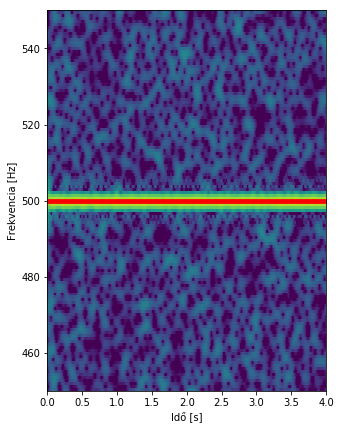

In [39]:
colornorm=colors.LogNorm(vmin=0.015, vmax=1.5)

plt.figure(figsize=(5,7))
plt.imshow(np.abs(stft),aspect='auto',extent = [tmin,tmax,nyquist/3,0],norm=colornorm)#,cmap='plasma' ,/len_fft*nyquist,0]
plt.plot(t_ax,ridgei[:wievd]/wievf_i*nyquist*2/3,'r.-',alpha=0.7)#/len_fft*nyquist,"r.-"#*wievf*len_fft/s_rate
#plt.plot(randrange_x,randrange_y,'y.-',linewidth=4)
plt.ylim(450,550)
plt.xlim(0,4)
plt.ylabel("Frekvencia [Hz]")
plt.xlabel("Idő [s]")
#cax = plt.axes([0.91, 0.23, 0.03, 0.54])
#plt.colorbar(cax=cax).set_label('Amplitúdó')
#plt.savefig(prefix_str+"stft", dpi =350)
plt.show()

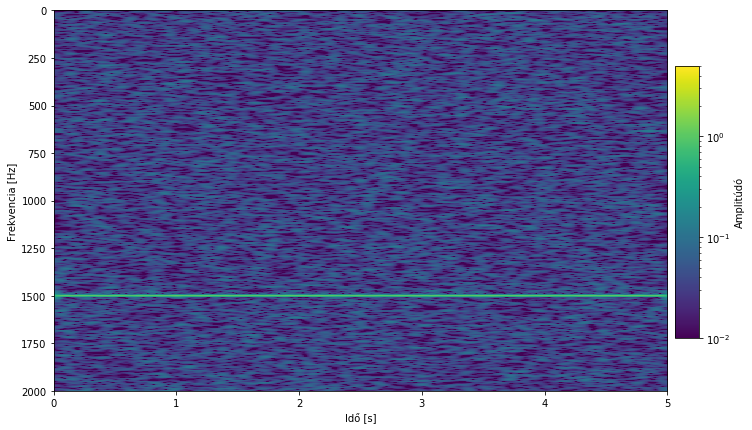

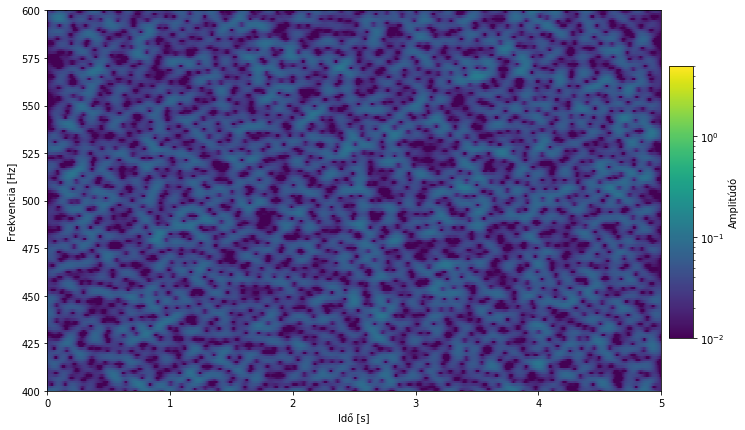

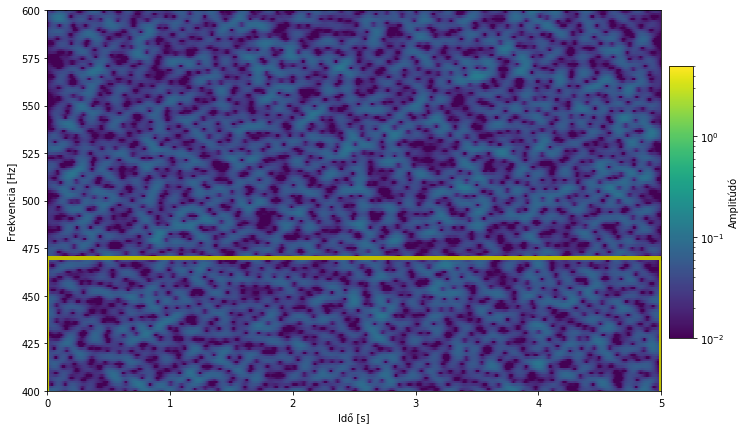

NameError: name 'v2' is not defined

<Figure size 720x504 with 0 Axes>

In [14]:

plt.figure(figsize=(11,7))
plt.imshow(np.abs(stft),aspect='auto',extent = [tmin,tmax,nyquist,0],norm=colornorm)#,cmap='plasma' ,/len_fft*nyquist,0]
#plt.plot(t_ax,ridgei[:wievd]/wievf_i*nyquist/1000,'r.-',alpha=0.7)#/len_fft*nyquist,"r.-"#*wievf*len_fft/s_rate
#plt.plot(randrange_x,randrange_y,'y.-',linewidth=4)
#plt.ylim(400,600)
#plt.xlim(0,4)
plt.ylabel("Frekvencia [Hz]")
plt.xlabel("Idő [s]")
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig(prefix_str+"stft", dpi =350)
plt.show()

plt.figure(figsize=(11,7))
plt.imshow(np.abs(stft[:wievf_i,:wievd]),aspect='auto',extent = [tmin,tmax,nyquist/2,0],norm=colornorm)#,cmap='plasma' ,/len_fft*nyquist,0]
plt.plot(t_ax,ridgei[:wievd]/wievf_i*nyquist,'r.-',alpha=0.7)#/len_fft*nyquist,"r.-"#*wievf*len_fft/s_rate
#plt.plot(randrange_x,randrange_y,'y.-',linewidth=4)
plt.ylim(400,600)
plt.xlim(0,t)
plt.ylabel("Frekvencia [Hz]")
plt.xlabel("Idő [s]")
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig(prefix_str+"ridge", dpi =350)
plt.show()

plt.figure(figsize=(11,7))
plt.imshow(np.abs(stft[:wievf_i,:wievd]),aspect='auto',extent = [tmin,tmax,nyquist/2,0],norm=colornorm)#,cmap='plasma' ,/len_fft*nyquist,0]
plt.plot(t_ax,ridgei[:wievd]/wievf_i*nyquist,'r.-',alpha=0.7)#/len_fft*nyquist,"r.-"#*wievf*len_fft/s_rate
plt.plot(randrange_x,randrange_y,'y.-',linewidth=4)
plt.ylim(400,600)
plt.xlim(0,t)
plt.ylabel("Frekvencia [Hz]")
plt.xlabel("Idő [s]")
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig(prefix_str+"ridge_range", dpi =350)
plt.show()


plt.figure(figsize=(10,7))
#plt.plot(dist_x,n,'.-')
x2=np.linspace(start=v2*0.9,num=500,stop=v2*1.1)
#plt.plot(dist_x,scipy.stats.rice.pdf(dist_x,shape_r,loc_r,scale_r),'r.-') 
plt.plot(x2,(scipy.stats.rice.pdf(x2,v2/s2,loc2,s2)-scipy.stats.norm.pdf(x2,loc=v2+loc2,scale=s2)),'-') 
plt.ylabel("Valószínűségi sűrűségfüggvény")
plt.xlabel("Amplitúdó")
plt.savefig("diff"+str(gi))
plt.show()